In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import mutual_info_score, adjusted_rand_score

In [74]:
df = pd.read_csv("onco_clean.csv")
df_clean = df.dropna()
df_clean

,Unnamed: 0,USUBJID,AGE,RACE,ETHNIC,ECOGBL,WEIGHTBL,HEIGHTBL,ALPBL,ALT,...,PSABL,ALB,WHOATC1,TESTOSBL,edbl_bone,edbl_sftts_node,edbl_viscera_liver,edbl_viscera_lung,BMI,GLEASBL_7
0,1,COU-AA-302_574-8349,79.0,WHITE,NOT HISPANIC OR LATINO,0.0,93.9,172.7,0.592308,0.171429,...,178.40,0.804348,1,0.044814,1,0,0,0,31.483349,<7
1,2,56021927PCR3001-7215371,72.0,WHITE,NOT HISPANIC OR LATINO,1.0,99.0,179.0,0.576923,0.314286,...,6.45,0.978261,1,0.044649,1,0,1,0,30.897912,>=7
2,3,56021927PCR3001-3885944,65.0,ASIAN,NOT HISPANIC OR LATINO,0.0,74.8,166.1,1.288000,0.395349,...,44.79,0.918367,1,0.049815,1,0,0,0,27.112049,>=7
3,4,56021927PCR3001-8496606,67.0,WHITE,NOT HISPANIC OR LATINO,1.0,84.5,175.0,0.840000,0.255814,...,99.78,0.918367,1,0.044649,0,1,0,0,27.591837,>=7
4,5,64091742PCR2001-579693,68.0,WHITE,NOT HISPANIC OR LATINO,0.0,87.4,173.0,1.648000,1.209302,...,2437.00,0.816327,1,0.044816,1,1,1,0,29.202446,<7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5792,5793,56021927PCR3001-1258223,89.0,WHITE,NOT HISPANIC OR LATINO,0.0,77.0,161.0,0.672000,0.285714,...,3.85,0.891304,1,0.044649,1,0,0,0,29.705644,>=7
5795,5796,COU-AA-302_840-5829,60.0,WHITE,NOT HISPANIC OR LATINO,0.0,100.7,174.0,0.576000,0.790698,...,34.33,0.938776,1,0.037662,0,1,0,0,33.260669,>=7
5796,5797,56021927PCR3001-1289968,70.0,ASIAN,NOT HISPANIC OR LATINO,0.0,62.6,163.3,0.615385,0.257143,...,8.98,0.891304,1,0.044649,1,0,0,0,23.474803,>=7
5797,5798,COU-AA-302_450-9280,75.0,OTHER,HISPANIC OR LATINO,0.0,88.5,179.0,0.630769,0.485714,...,32.90,0.739130,1,0.044814,0,1,0,0,27.620861,<7


In [75]:
features = ["WEIGHTBL", "HEIGHTBL", "ALPBL", "ALT", "AST", "BILI", "CREAT", "HGBBL", "LDHBL", "PLAT", "PSABL", "ALB", "TESTOSBL", "BMI"]
df_clean = pd.get_dummies(df_clean, columns=["AGE",	"RACE",	"ETHNIC", "ECOGBL", "WHOATC1", "edbl_bone",	"edbl_sftts_node", "edbl_viscera_liver", "edbl_viscera_lung", "GLEASBL_7"])

age_dummies = [col for col in df_clean.columns if col.startswith("AGE")]
features.extend(age_dummies)
df_clean[age_dummies] = df_clean[age_dummies].astype(int)

race_dummies = [col for col in df_clean.columns if col.startswith("RACE")]
features.extend(race_dummies)
df_clean[race_dummies] = df_clean[race_dummies].astype(int)

ethnic_dummies = [col for col in df_clean.columns if col.startswith("ETHNIC")]
features.extend(ethnic_dummies)
df_clean[ethnic_dummies] = df_clean[ethnic_dummies].astype(int)

ecogbl_dummies = [col for col in df_clean.columns if col.startswith("ECOGBL")]
features.extend(ecogbl_dummies)
df_clean[ecogbl_dummies] = df_clean[ecogbl_dummies].astype(int)

whoatc1_dummies = [col for col in df_clean.columns if col.startswith("WHOATC1")]
features.extend(whoatc1_dummies)
df_clean[whoatc1_dummies] = df_clean[whoatc1_dummies].astype(int)

edbl_bone_dummies = [col for col in df_clean.columns if col.startswith("edbl_bone")]
features.extend(edbl_bone_dummies)
df_clean[edbl_bone_dummies] = df_clean[edbl_bone_dummies].astype(int)

edbl_sftts_node_dummies = [col for col in df_clean.columns if col.startswith("edbl_sftts_node")]
features.extend(edbl_sftts_node_dummies)
df_clean[edbl_sftts_node_dummies] = df_clean[edbl_sftts_node_dummies].astype(int)

edbl_viscera_liver_dummies = [col for col in df_clean.columns if col.startswith("edbl_viscera_liver")]
features.extend(edbl_viscera_liver_dummies)
df_clean[edbl_viscera_liver_dummies] = df_clean[edbl_viscera_liver_dummies].astype(int)

edbl_viscera_lung_dummies = [col for col in df_clean.columns if col.startswith("edbl_viscera_lung")]
features.extend(edbl_viscera_lung_dummies)
df_clean[edbl_viscera_lung_dummies] = df_clean[edbl_viscera_lung_dummies].astype(int)

gleasbl_7_dummies = [col for col in df_clean.columns if col.startswith("GLEASBL_7")]
features.extend(gleasbl_7_dummies)
df_clean[gleasbl_7_dummies] = df_clean[gleasbl_7_dummies].astype(int)

In [76]:
df_clean = df_clean.rename(columns={'USUBJID': 'PatientID'})
df_clean.drop(columns=["Unnamed: 0"])

,PatientID,WEIGHTBL,HEIGHTBL,ALPBL,ALT,AST,BILI,CREAT,HGBBL,LDHBL,...,edbl_bone_0,edbl_bone_1,edbl_sftts_node_0,edbl_sftts_node_1,edbl_viscera_liver_0,edbl_viscera_liver_1,edbl_viscera_lung_0,edbl_viscera_lung_1,GLEASBL_7_<7,GLEASBL_7_>=7
0,COU-AA-302_574-8349,93.9,172.7,0.592308,0.171429,0.361111,0.666667,0.733333,0.623529,0.692308,...,0,1,1,0,1,0,1,0,1,0
1,56021927PCR3001-7215371,99.0,179.0,0.576923,0.314286,0.583333,0.571429,0.795620,0.770588,1.047009,...,0,1,1,0,0,1,1,0,0,1
2,56021927PCR3001-3885944,74.8,166.1,1.288000,0.395349,0.638889,0.619048,0.546218,0.741176,1.226496,...,0,1,1,0,1,0,1,0,0,1
3,56021927PCR3001-8496606,84.5,175.0,0.840000,0.255814,0.388889,0.333333,1.042017,0.641176,0.675214,...,1,0,0,1,1,0,1,0,0,1
4,64091742PCR2001-579693,87.4,173.0,1.648000,1.209302,2.111111,0.333333,0.890756,0.717647,1.824786,...,0,1,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5792,56021927PCR3001-1258223,77.0,161.0,0.672000,0.285714,0.416667,0.285714,0.765517,0.652941,0.709402,...,0,1,1,0,1,0,1,0,0,1
5795,COU-AA-302_840-5829,100.7,174.0,0.576000,0.790698,0.805556,0.333333,0.846154,0.782353,0.790598,...,1,0,0,1,1,0,1,0,0,1
5796,56021927PCR3001-1289968,62.6,163.3,0.615385,0.257143,0.472222,0.333333,0.510949,0.741176,0.803419,...,0,1,1,0,1,0,1,0,0,1
5797,COU-AA-302_450-9280,88.5,179.0,0.630769,0.485714,0.583333,0.500000,0.666667,0.688235,0.918803,...,1,0,0,1,1,0,1,0,1,0


In [77]:
numpy_array_data = df_clean[features].to_numpy()
print(numpy_array_data)

[[ 93.9        172.7          0.59230769 ...   0.           1.
    0.        ]
 [ 99.         179.           0.57692308 ...   0.           0.
    1.        ]
 [ 74.8        166.1          1.288      ...   0.           0.
    1.        ]
 ...
 [ 62.6        163.3          0.61538462 ...   0.           0.
    1.        ]
 [ 88.5        179.           0.63076923 ...   0.           1.
    0.        ]
 [ 61.         165.           0.80769231 ...   0.           1.
    0.        ]]


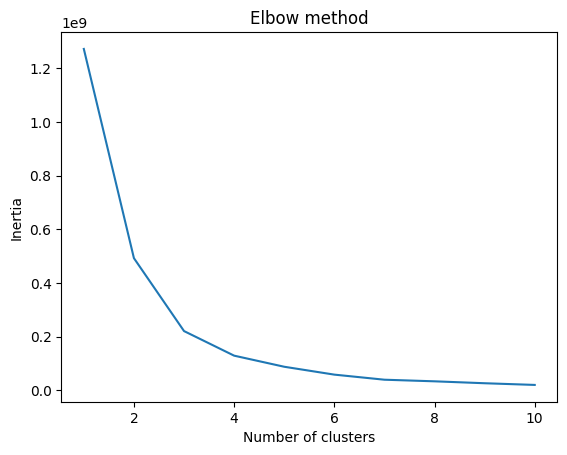

In [78]:
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(numpy_array_data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias)
plt.title("Elbow method")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [79]:
X = df_clean[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [80]:
kmeans = KMeans(n_clusters=3, random_state=0)
labels_km = kmeans.fit_predict(X_scaled)
centroids = kmeans.cluster_centers_
df_clean["KMeans cluster"] = labels_km
df_clean

,Unnamed: 0,PatientID,WEIGHTBL,HEIGHTBL,ALPBL,ALT,AST,BILI,CREAT,HGBBL,...,edbl_bone_1,edbl_sftts_node_0,edbl_sftts_node_1,edbl_viscera_liver_0,edbl_viscera_liver_1,edbl_viscera_lung_0,edbl_viscera_lung_1,GLEASBL_7_<7,GLEASBL_7_>=7,KMeans cluster
0,1,COU-AA-302_574-8349,93.9,172.7,0.592308,0.171429,0.361111,0.666667,0.733333,0.623529,...,1,1,0,1,0,1,0,1,0,1
1,2,56021927PCR3001-7215371,99.0,179.0,0.576923,0.314286,0.583333,0.571429,0.795620,0.770588,...,1,1,0,0,1,1,0,0,1,0
2,3,56021927PCR3001-3885944,74.8,166.1,1.288000,0.395349,0.638889,0.619048,0.546218,0.741176,...,1,1,0,1,0,1,0,0,1,2
3,4,56021927PCR3001-8496606,84.5,175.0,0.840000,0.255814,0.388889,0.333333,1.042017,0.641176,...,0,0,1,1,0,1,0,0,1,0
4,5,64091742PCR2001-579693,87.4,173.0,1.648000,1.209302,2.111111,0.333333,0.890756,0.717647,...,1,0,1,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5792,5793,56021927PCR3001-1258223,77.0,161.0,0.672000,0.285714,0.416667,0.285714,0.765517,0.652941,...,1,1,0,1,0,1,0,0,1,1
5795,5796,COU-AA-302_840-5829,100.7,174.0,0.576000,0.790698,0.805556,0.333333,0.846154,0.782353,...,0,0,1,1,0,1,0,0,1,1
5796,5797,56021927PCR3001-1289968,62.6,163.3,0.615385,0.257143,0.472222,0.333333,0.510949,0.741176,...,1,1,0,1,0,1,0,0,1,2
5797,5798,COU-AA-302_450-9280,88.5,179.0,0.630769,0.485714,0.583333,0.500000,0.666667,0.688235,...,0,0,1,1,0,1,0,1,0,2


/var/folders/2l/lmtfyvln51l043yd4s406mpr0000gp/T/ipykernel_89182/3341325573.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


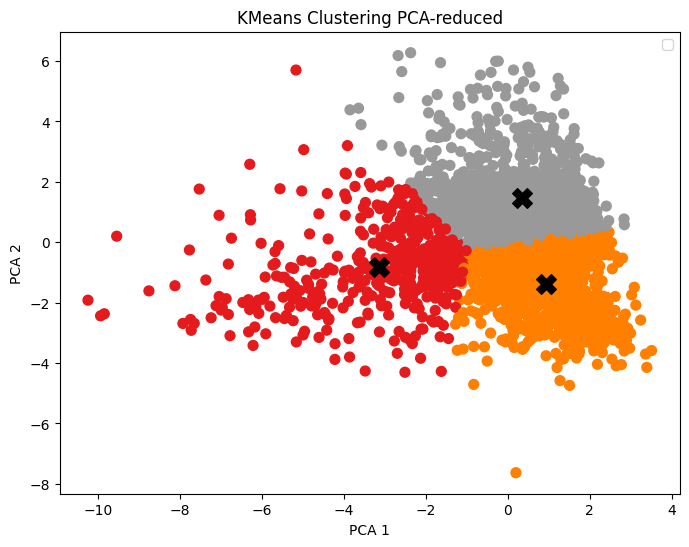

In [81]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, random_state=0)
labels_km2 = kmeans.fit_predict(X_pca)
centroids = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_km2, cmap='Set1', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200)
plt.title('KMeans Clustering PCA-reduced')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [82]:
silhouette = silhouette_score(X, labels_km)
db_index = davies_bouldin_score(X, labels_km)
ch_index = calinski_harabasz_score(X, labels_km)

print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: -0.01
Davies-Bouldin Index: 4.24
Calinski-Harabasz Index: 54.79


In [83]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [138]:
X = df_clean[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model_agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_agg = model_agg.fit_predict(X_scaled)
df_clean["Agglomerative Cluster"] = labels_agg
df_clean

,Unnamed: 0,PatientID,WEIGHTBL,HEIGHTBL,ALPBL,ALT,AST,BILI,CREAT,HGBBL,...,GLEASBL_7_<7,GLEASBL_7_>=7,KMeans cluster,Agglomerative Cluster,DB Cluster,Mean Shift cluster,Leiden cluster,Hierarchical cluster (Gower Distance),K-Prototypes cluster,LCA prob
0,1,COU-AA-302_574-8349,93.9,172.7,0.592308,0.171429,0.361111,0.666667,0.733333,0.623529,...,1,0,1,0,-1,0,1,1,1,2
1,2,56021927PCR3001-7215371,99.0,179.0,0.576923,0.314286,0.583333,0.571429,0.795620,0.770588,...,0,1,0,2,-1,0,0,1,1,2
2,3,56021927PCR3001-3885944,74.8,166.1,1.288000,0.395349,0.638889,0.619048,0.546218,0.741176,...,0,1,2,0,-1,0,0,1,1,2
3,4,56021927PCR3001-8496606,84.5,175.0,0.840000,0.255814,0.388889,0.333333,1.042017,0.641176,...,0,1,0,0,-1,0,1,1,1,2
4,5,64091742PCR2001-579693,87.4,173.0,1.648000,1.209302,2.111111,0.333333,0.890756,0.717647,...,1,0,0,2,-1,0,2,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5792,5793,56021927PCR3001-1258223,77.0,161.0,0.672000,0.285714,0.416667,0.285714,0.765517,0.652941,...,0,1,1,0,-1,15,0,1,1,1
5795,5796,COU-AA-302_840-5829,100.7,174.0,0.576000,0.790698,0.805556,0.333333,0.846154,0.782353,...,0,1,1,0,-1,0,0,1,1,1
5796,5797,56021927PCR3001-1289968,62.6,163.3,0.615385,0.257143,0.472222,0.333333,0.510949,0.741176,...,0,1,2,0,-1,0,0,1,1,1
5797,5798,COU-AA-302_450-9280,88.5,179.0,0.630769,0.485714,0.583333,0.500000,0.666667,0.688235,...,1,0,2,0,-1,0,0,2,1,1


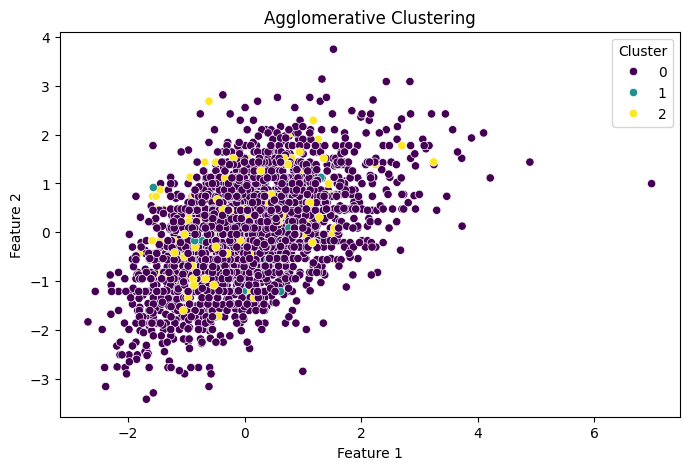

In [85]:
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue = labels_agg, palette = 'viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()

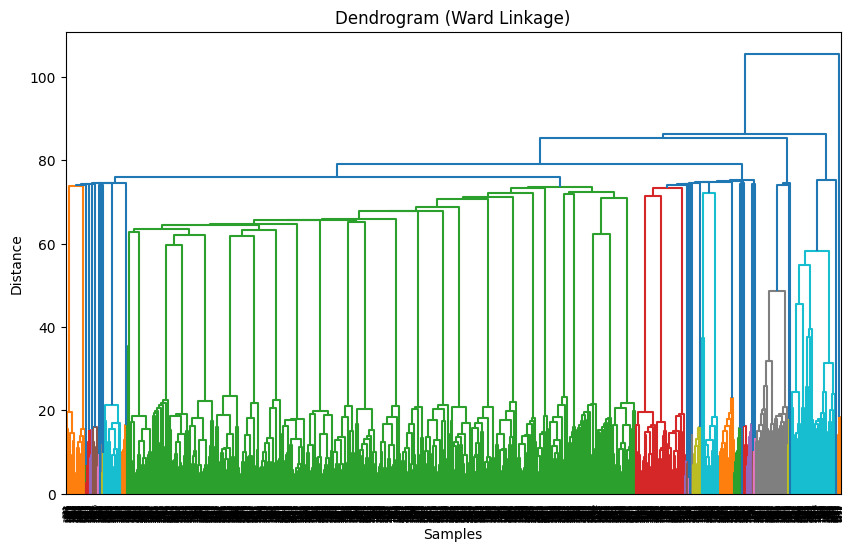

In [86]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked, orientation = 'top', distance_sort = 'descending', show_leaf_counts = False)
plt.title('Dendrogram (Ward Linkage)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [87]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn import datasets
from sklearn.metrics import adjusted_rand_score

In [88]:
X = df_clean[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
db = DBSCAN(eps=0.3, min_samples=10)
clusters = db.fit_predict(X_scaled)
df_clean["DB Cluster"] = clusters
df_clean

,Unnamed: 0,PatientID,WEIGHTBL,HEIGHTBL,ALPBL,ALT,AST,BILI,CREAT,HGBBL,...,edbl_sftts_node_1,edbl_viscera_liver_0,edbl_viscera_liver_1,edbl_viscera_lung_0,edbl_viscera_lung_1,GLEASBL_7_<7,GLEASBL_7_>=7,KMeans cluster,Agglomerative Cluster,DB Cluster
0,1,COU-AA-302_574-8349,93.9,172.7,0.592308,0.171429,0.361111,0.666667,0.733333,0.623529,...,0,1,0,1,0,1,0,1,0,-1
1,2,56021927PCR3001-7215371,99.0,179.0,0.576923,0.314286,0.583333,0.571429,0.795620,0.770588,...,0,0,1,1,0,0,1,0,2,-1
2,3,56021927PCR3001-3885944,74.8,166.1,1.288000,0.395349,0.638889,0.619048,0.546218,0.741176,...,0,1,0,1,0,0,1,2,0,-1
3,4,56021927PCR3001-8496606,84.5,175.0,0.840000,0.255814,0.388889,0.333333,1.042017,0.641176,...,1,1,0,1,0,0,1,0,0,-1
4,5,64091742PCR2001-579693,87.4,173.0,1.648000,1.209302,2.111111,0.333333,0.890756,0.717647,...,1,0,1,1,0,1,0,0,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5792,5793,56021927PCR3001-1258223,77.0,161.0,0.672000,0.285714,0.416667,0.285714,0.765517,0.652941,...,0,1,0,1,0,0,1,1,0,-1
5795,5796,COU-AA-302_840-5829,100.7,174.0,0.576000,0.790698,0.805556,0.333333,0.846154,0.782353,...,1,1,0,1,0,0,1,1,0,-1
5796,5797,56021927PCR3001-1289968,62.6,163.3,0.615385,0.257143,0.472222,0.333333,0.510949,0.741176,...,0,1,0,1,0,0,1,2,0,-1
5797,5798,COU-AA-302_450-9280,88.5,179.0,0.630769,0.485714,0.583333,0.500000,0.666667,0.688235,...,1,1,0,1,0,1,0,2,0,-1


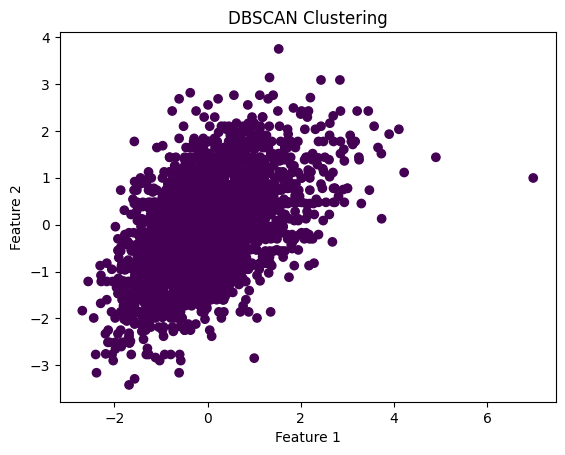

In [89]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("DBSCAN Clustering")
plt.show()

In [90]:
from sklearn.cluster import MeanShift

In [91]:
X = df_clean[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
mean_shift = MeanShift()
labels_ms = mean_shift.fit_predict(X_scaled)
df_clean["Mean Shift cluster"] = labels_ms
df_clean

,Unnamed: 0,PatientID,WEIGHTBL,HEIGHTBL,ALPBL,ALT,AST,BILI,CREAT,HGBBL,...,edbl_viscera_liver_0,edbl_viscera_liver_1,edbl_viscera_lung_0,edbl_viscera_lung_1,GLEASBL_7_<7,GLEASBL_7_>=7,KMeans cluster,Agglomerative Cluster,DB Cluster,Mean Shift cluster
0,1,COU-AA-302_574-8349,93.9,172.7,0.592308,0.171429,0.361111,0.666667,0.733333,0.623529,...,1,0,1,0,1,0,1,0,-1,0
1,2,56021927PCR3001-7215371,99.0,179.0,0.576923,0.314286,0.583333,0.571429,0.795620,0.770588,...,0,1,1,0,0,1,0,2,-1,0
2,3,56021927PCR3001-3885944,74.8,166.1,1.288000,0.395349,0.638889,0.619048,0.546218,0.741176,...,1,0,1,0,0,1,2,0,-1,0
3,4,56021927PCR3001-8496606,84.5,175.0,0.840000,0.255814,0.388889,0.333333,1.042017,0.641176,...,1,0,1,0,0,1,0,0,-1,0
4,5,64091742PCR2001-579693,87.4,173.0,1.648000,1.209302,2.111111,0.333333,0.890756,0.717647,...,0,1,1,0,1,0,0,2,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5792,5793,56021927PCR3001-1258223,77.0,161.0,0.672000,0.285714,0.416667,0.285714,0.765517,0.652941,...,1,0,1,0,0,1,1,0,-1,15
5795,5796,COU-AA-302_840-5829,100.7,174.0,0.576000,0.790698,0.805556,0.333333,0.846154,0.782353,...,1,0,1,0,0,1,1,0,-1,0
5796,5797,56021927PCR3001-1289968,62.6,163.3,0.615385,0.257143,0.472222,0.333333,0.510949,0.741176,...,1,0,1,0,0,1,2,0,-1,0
5797,5798,COU-AA-302_450-9280,88.5,179.0,0.630769,0.485714,0.583333,0.500000,0.666667,0.688235,...,1,0,1,0,1,0,2,0,-1,0


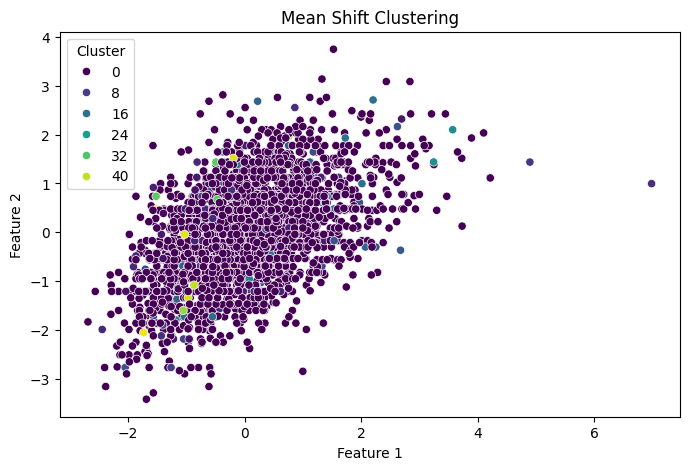

In [92]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue = labels_ms, palette='viridis')
plt.title("Mean Shift Clustering")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()

In [93]:
import igraph as ig
import leidenalg
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import kneighbors_graph
import umap
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

In [94]:
X = df_clean[features]
X_array = X.values

#dimension reduction
X_tensor = torch.tensor(X_array.astype(np.float32))
dataset = TensorDataset(X_tensor)
loader = DataLoader(dataset, batch_size=64, shuffle=True)

class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim=30):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim)
        )
    def forward(self, x):
        z = self.encoder(x)
        return self.decoder(z)

autoencoder = Autoencoder(input_dim=X_array.shape[1], latent_dim=10)
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

for epoch in range(20):
    for batch in loader:
        x_batch = batch[0]
        output = autoencoder(x_batch)
        loss = loss_fn(output, x_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

with torch.no_grad():
    latent = autoencoder.encoder(X_tensor).numpy()

#build knn graph
knn_graph = kneighbors_graph(latent, n_neighbors=15, include_self=False)

#convert sparse matrix to graph
sources, targets = knn_graph.nonzero()
edges = list(zip(sources, targets))

#create igraph object
g = ig.Graph(edges=edges, directed=False)
g.vs["name"] = list(range(len(latent)))

#apply leiden clustering
partition = leidenalg.find_partition(g, leidenalg.RBConfigurationVertexPartition, resolution_parameter=0.05)
labels_lc = np.array(partition.membership)

df_clean["Leiden cluster"] = labels_lc
df_clean

,Unnamed: 0,PatientID,WEIGHTBL,HEIGHTBL,ALPBL,ALT,AST,BILI,CREAT,HGBBL,...,edbl_viscera_liver_1,edbl_viscera_lung_0,edbl_viscera_lung_1,GLEASBL_7_<7,GLEASBL_7_>=7,KMeans cluster,Agglomerative Cluster,DB Cluster,Mean Shift cluster,Leiden cluster
0,1,COU-AA-302_574-8349,93.9,172.7,0.592308,0.171429,0.361111,0.666667,0.733333,0.623529,...,0,1,0,1,0,1,0,-1,0,1
1,2,56021927PCR3001-7215371,99.0,179.0,0.576923,0.314286,0.583333,0.571429,0.795620,0.770588,...,1,1,0,0,1,0,2,-1,0,0
2,3,56021927PCR3001-3885944,74.8,166.1,1.288000,0.395349,0.638889,0.619048,0.546218,0.741176,...,0,1,0,0,1,2,0,-1,0,0
3,4,56021927PCR3001-8496606,84.5,175.0,0.840000,0.255814,0.388889,0.333333,1.042017,0.641176,...,0,1,0,0,1,0,0,-1,0,1
4,5,64091742PCR2001-579693,87.4,173.0,1.648000,1.209302,2.111111,0.333333,0.890756,0.717647,...,1,1,0,1,0,0,2,-1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5792,5793,56021927PCR3001-1258223,77.0,161.0,0.672000,0.285714,0.416667,0.285714,0.765517,0.652941,...,0,1,0,0,1,1,0,-1,15,0
5795,5796,COU-AA-302_840-5829,100.7,174.0,0.576000,0.790698,0.805556,0.333333,0.846154,0.782353,...,0,1,0,0,1,1,0,-1,0,0
5796,5797,56021927PCR3001-1289968,62.6,163.3,0.615385,0.257143,0.472222,0.333333,0.510949,0.741176,...,0,1,0,0,1,2,0,-1,0,0
5797,5798,COU-AA-302_450-9280,88.5,179.0,0.630769,0.485714,0.583333,0.500000,0.666667,0.688235,...,0,1,0,1,0,2,0,-1,0,0


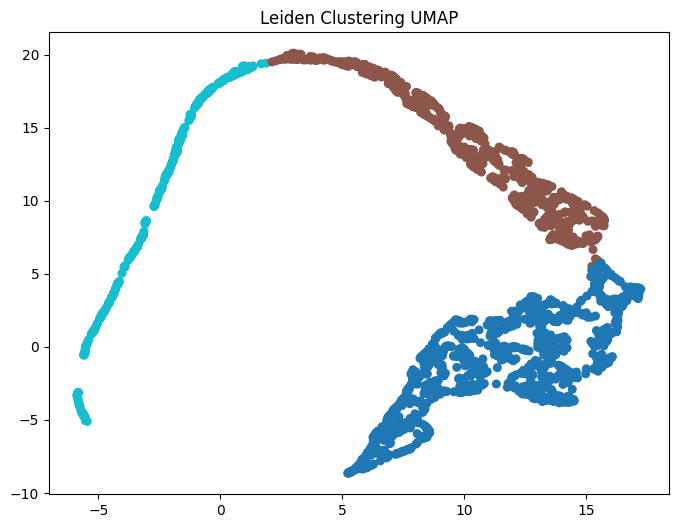

In [95]:
reducer = umap.UMAP()
latent_umap = reducer.fit_transform(latent)

plt.figure(figsize=(8,6))
plt.scatter(latent_umap[:, 0], latent_umap[:, 1], c=labels_lc, cmap='tab10', s=30)
plt.title("Leiden Clustering UMAP")
plt.show()

In [96]:
silhouette = silhouette_score(X_array, labels_lc)
db_index = davies_bouldin_score(X_array, labels_lc)
ch_index = calinski_harabasz_score(X_array, labels_lc)

print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.39
Davies-Bouldin Index: 0.86
Calinski-Harabasz Index: 636.99


In [97]:
#Kaplan Meier Curve
from lifelines import KaplanMeierFitter
%matplotlib inline

In [98]:
kmf = KaplanMeierFitter()

In [99]:
survival_df = pd.read_csv("Survival_time_and_censor.csv")
df_merged = pd.merge(survival_df, df_clean[['PatientID', 'Leiden cluster']], on='PatientID', how='inner')
df_merged.head()

,Unnamed: 0,PatientID,OS_time_month,OS_Censor_1_is_censor,Leiden cluster
0,8,COU-AA-301_261-9703,7.556468,0,2
1,9,COU-AA-301_187-2053,11.039014,0,0
2,11,COU-AA-302_974-0100,14.160200,0,0
3,12,56021927PCR3001-5742910,52.008214,1,0
4,13,COU-AA-302_783-8263,34.891200,0,2


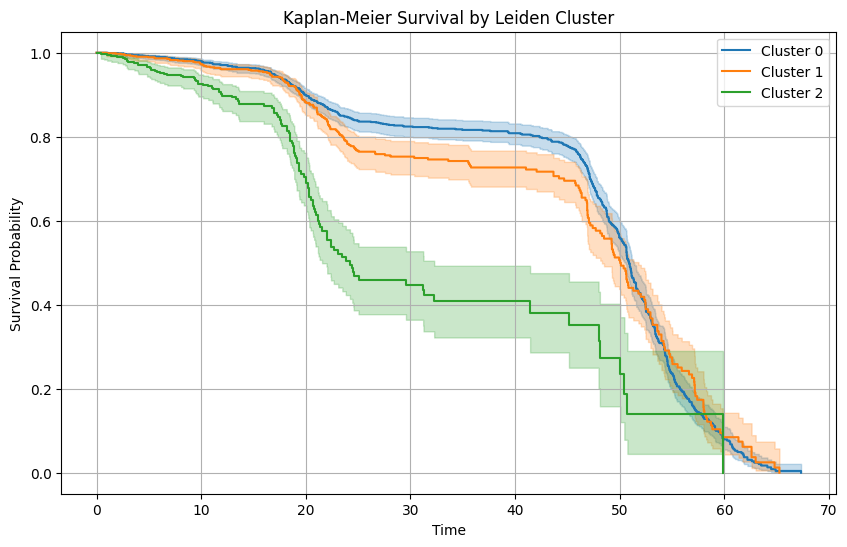

In [100]:
plt.figure(figsize=(10, 6))
for cluster_id in sorted(df_merged['Leiden cluster'].unique()):
    group = df_merged[df_merged["Leiden cluster"] == cluster_id]
    kmf.fit(group['OS_time_month'], group['OS_Censor_1_is_censor'], label=f'Cluster {cluster_id}')
    kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival by Leiden Cluster')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend()
plt.grid(True)
plt.show()

In [101]:
import gower

In [102]:
gower_dist = gower.gower_matrix(df_clean)

/var/folders/2l/lmtfyvln51l043yd4s406mpr0000gp/T/ipykernel_89182/1957179381.py:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(gower_dist, method='average')


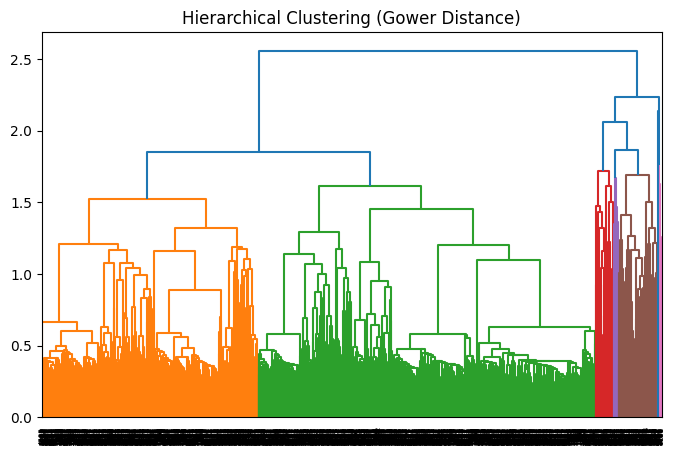

In [103]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
linkage_matrix = linkage(gower_dist, method='average')
plt.figure(figsize=(8, 5))
dendrogram(linkage_matrix, labels = df_clean.index.tolist())
plt.title("Hierarchical Clustering (Gower Distance)")
plt.show()

In [104]:
labels = fcluster(linkage_matrix, t=2, criterion='maxclust')
df_clean["Hierarchical cluster (Gower Distance)"] = labels
df_clean.head()

,Unnamed: 0,PatientID,WEIGHTBL,HEIGHTBL,ALPBL,ALT,AST,BILI,CREAT,HGBBL,...,edbl_viscera_lung_0,edbl_viscera_lung_1,GLEASBL_7_<7,GLEASBL_7_>=7,KMeans cluster,Agglomerative Cluster,DB Cluster,Mean Shift cluster,Leiden cluster,Hierarchical cluster (Gower Distance)
0,1,COU-AA-302_574-8349,93.9,172.7,0.592308,0.171429,0.361111,0.666667,0.733333,0.623529,...,1,0,1,0,1,0,-1,0,1,1
1,2,56021927PCR3001-7215371,99.0,179.0,0.576923,0.314286,0.583333,0.571429,0.795620,0.770588,...,1,0,0,1,0,2,-1,0,0,1
2,3,56021927PCR3001-3885944,74.8,166.1,1.288000,0.395349,0.638889,0.619048,0.546218,0.741176,...,1,0,0,1,2,0,-1,0,0,1
3,4,56021927PCR3001-8496606,84.5,175.0,0.840000,0.255814,0.388889,0.333333,1.042017,0.641176,...,1,0,0,1,0,0,-1,0,1,1
4,5,64091742PCR2001-579693,87.4,173.0,1.648000,1.209302,2.111111,0.333333,0.890756,0.717647,...,1,0,1,0,0,2,-1,0,2,2


In [105]:
from kmodes.kprototypes import KPrototypes

In [106]:
#X_array
cat_cols = [14, 88]
kproto = KPrototypes(n_clusters=2, init='Cao', verbose=2)
clusters = kproto.fit_predict(X_array, categorical=cat_cols)
df_clean["K-Prototypes cluster"] = clusters
df_clean.head()

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 13, ncost: 501285019.20688313
Run: 1, iteration: 2/100, moves: 13, ncost: 496245787.0479021
Run: 1, iteration: 3/100, moves: 9, ncost: 492947945.2827375
Run: 1, iteration: 4/100, moves: 0, ncost: 492947945.2827375
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 93, ncost: 514951408.93916255
Run: 2, iteration: 2/100, moves: 22, ncost: 502152401.6269241
Run: 2, iteration: 3/100, moves: 14, ncost: 496747589.62892884
Run: 2, iteration: 4/100, moves: 10, ncost: 492947945.2827376
Run: 2, iteration: 5/100, moves: 0, ncost: 492947945.2827376
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 109, ncost: 536461220.13214964
Run: 

,Unnamed: 0,PatientID,WEIGHTBL,HEIGHTBL,ALPBL,ALT,AST,BILI,CREAT,HGBBL,...,edbl_viscera_lung_1,GLEASBL_7_<7,GLEASBL_7_>=7,KMeans cluster,Agglomerative Cluster,DB Cluster,Mean Shift cluster,Leiden cluster,Hierarchical cluster (Gower Distance),K-Prototypes cluster
0,1,COU-AA-302_574-8349,93.9,172.7,0.592308,0.171429,0.361111,0.666667,0.733333,0.623529,...,0,1,0,1,0,-1,0,1,1,1
1,2,56021927PCR3001-7215371,99.0,179.0,0.576923,0.314286,0.583333,0.571429,0.795620,0.770588,...,0,0,1,0,2,-1,0,0,1,1
2,3,56021927PCR3001-3885944,74.8,166.1,1.288000,0.395349,0.638889,0.619048,0.546218,0.741176,...,0,0,1,2,0,-1,0,0,1,1
3,4,56021927PCR3001-8496606,84.5,175.0,0.840000,0.255814,0.388889,0.333333,1.042017,0.641176,...,0,0,1,0,0,-1,0,1,1,1
4,5,64091742PCR2001-579693,87.4,173.0,1.648000,1.209302,2.111111,0.333333,0.890756,0.717647,...,0,1,0,0,2,-1,0,2,2,0


In [107]:
from sklearn.preprocessing import LabelEncoder

In [108]:
df_num = df_clean.drop(columns = ["Unnamed: 0",	"PatientID"])

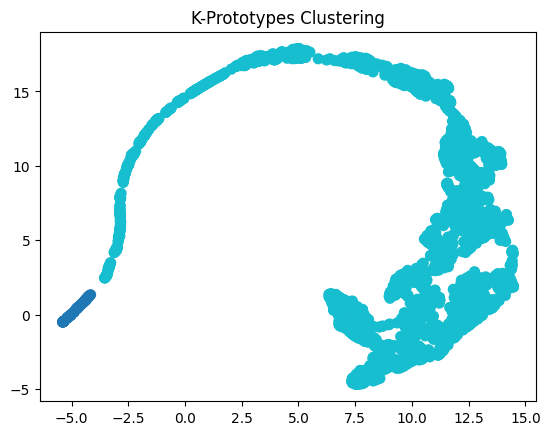

In [109]:
df_encoded = df_num.copy()
for col in ['AGE_39.0', 'GLEASBL_7_>=7']:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])
reducer = umap.UMAP()
embedding = reducer.fit_transform(df_encoded.drop('K-Prototypes cluster', axis=1))
plt.scatter(embedding[:, 0], embedding[:, 1], c=df_clean["K-Prototypes cluster"], cmap='tab10', s=50)
plt.title("K-Prototypes Clustering")
plt.show()

In [110]:
from sklearn.mixture import GaussianMixture

In [111]:
df_dummies = pd.get_dummies(df_clean)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(df_dummies)
probs = gmm.predict_proba(df_dummies)
labels_gmm = gmm.predict(df_dummies)
df_clean["LCA prob"] = labels_gmm
df_clean.head()

,Unnamed: 0,PatientID,WEIGHTBL,HEIGHTBL,ALPBL,ALT,AST,BILI,CREAT,HGBBL,...,GLEASBL_7_<7,GLEASBL_7_>=7,KMeans cluster,Agglomerative Cluster,DB Cluster,Mean Shift cluster,Leiden cluster,Hierarchical cluster (Gower Distance),K-Prototypes cluster,LCA prob
0,1,COU-AA-302_574-8349,93.9,172.7,0.592308,0.171429,0.361111,0.666667,0.733333,0.623529,...,1,0,1,0,-1,0,1,1,1,2
1,2,56021927PCR3001-7215371,99.0,179.0,0.576923,0.314286,0.583333,0.571429,0.795620,0.770588,...,0,1,0,2,-1,0,0,1,1,2
2,3,56021927PCR3001-3885944,74.8,166.1,1.288000,0.395349,0.638889,0.619048,0.546218,0.741176,...,0,1,2,0,-1,0,0,1,1,2
3,4,56021927PCR3001-8496606,84.5,175.0,0.840000,0.255814,0.388889,0.333333,1.042017,0.641176,...,0,1,0,0,-1,0,1,1,1,2
4,5,64091742PCR2001-579693,87.4,173.0,1.648000,1.209302,2.111111,0.333333,0.890756,0.717647,...,1,0,0,2,-1,0,2,2,0,2


/Users/vanessa/Library/Python/3.9/lib/python/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/vanessa/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


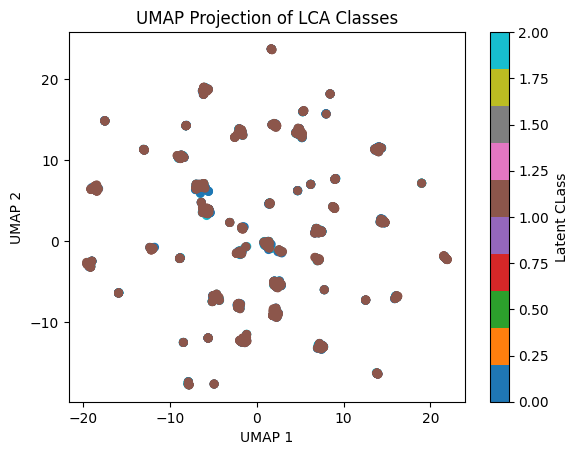

In [112]:
embedding_dummies = umap.UMAP(random_state=42).fit_transform(StandardScaler().fit_transform(df_dummies))
plt.scatter(embedding_dummies[:, 0], embedding_dummies[:, 1], c=labels_gmm, cmap='tab10', s=30)
plt.title("UMAP Projection of LCA Classes")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.colorbar(label="Latent CLass")
plt.show()

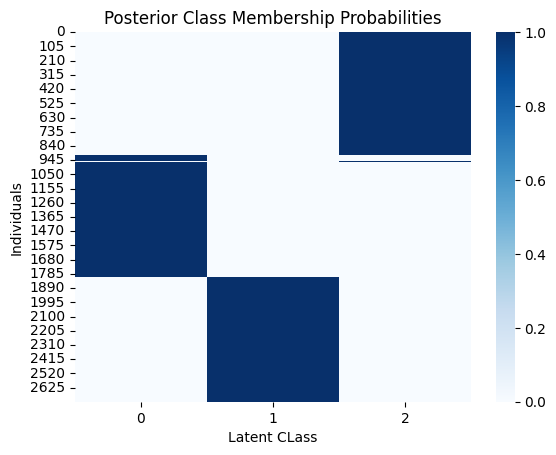

In [113]:
import seaborn as sns
sns.heatmap(probs, cmap="Blues", cbar=True)
plt.title("Posterior Class Membership Probabilities")
plt.xlabel("Latent CLass")
plt.ylabel("Individuals")
plt.show()

In [123]:
from lifelines import CoxPHFitter

In [132]:
df_clean_merged = df_merged.drop(columns = ['PatientID', 'Unnamed: 0'])

In [134]:
cph = CoxPHFitter()
cph.fit(df_clean_merged, duration_col = 'OS_time_month', event_col = 'OS_Censor_1_is_censor')

c_index = cph.concordance_index_
print("C-index", c_index)

C-index 0.5918651656630611


In [155]:
from sksurv.datasets import get_x_y
from sksurv.util import Surv
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sklearn.model_selection import train_test_split

In [156]:
y = Surv.from_dataframe('OS_Censor_1_is_censor', 'OS_time_month', df_clean_merged)
X = df_clean_merged.drop(columns = ['OS_Censor_1_is_censor', 'OS_time_month'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = CoxPHSurvivalAnalysis()
model.fit(X_train, y_train)

/Users/vanessa/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


CoxPHSurvivalAnalysis()

In [160]:
from sksurv.metrics import brier_score

pred_surv = model.predict_survival_function(X_test)
times = np.percentile(df_clean_merged['OS_time_month'], [25, 50, 75])
times = times[times < df_clean_merged['OS_time_month'].max()]
pred_surv_matrix = np.asarray([[fn(t) for t in times] for fn in pred_surv])
brier_scores, _ = brier_score(y_train, y_test, pred_surv_matrix, times)
for t, score in zip(times, brier_scores):
    print(f"Time: {t:.2f}, Brier Score: {score:.4f}")

Time: 11.99, Brier Score: 11.9918
Time: 20.83, Brier Score: 20.8296
Time: 39.43, Brier Score: 39.4251


/Users/vanessa/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [170]:
from sksurv.metrics import cumulative_dynamic_auc

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model2 = CoxPHSurvivalAnalysis()
model2.fit(X_train, y_train)
pred_surv2 = model.predict_survival_function(X_test)
pred_surv_matrix2 = np.asarray([[fn(t) for t in times] for fn in pred_surv2])
times = np.percentile(df_clean_merged['OS_time_month'], [25, 50, 75])
times = times[times < df_clean_merged['OS_time_month'].max()]
auc_scores, mean_auc = cumulative_dynamic_auc(y_train, y_test, pred_surv_matrix2, times)

for t, auc in zip(times, auc_scores):
    print(f"Time: {t:.2f}, AUC Score: {auc:.4f}")

Time: 11.99, AUC Score: 0.4539
Time: 20.83, AUC Score: 0.3756
Time: 39.43, AUC Score: 0.3175


/Users/vanessa/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/vanessa/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


<Axes: xlabel='log(HR) (95% CI)'>

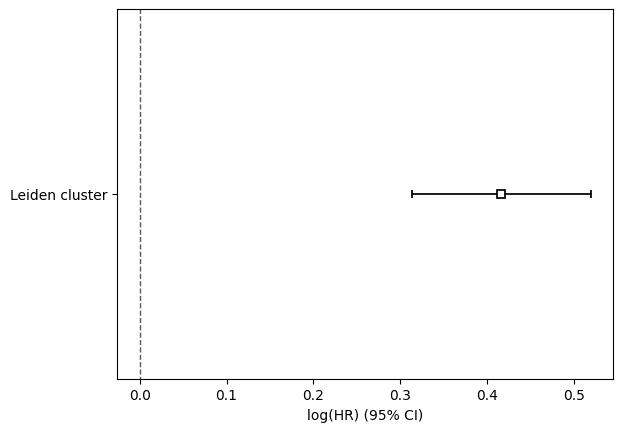

In [150]:
cph.plot()

In [151]:
cph.check_assumptions(df_clean_merged, p_value_threshold=0.05)

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 2729 total observations, 1833 right-censored observations>
         test_name = proportional_hazard_test

---
                     test_statistic      p  -log2(p)
Leiden cluster km             28.04 <0.005     23.00
               rank           27.65 <0.005     22.72



1. Variable 'Leiden cluster' failed the non-proportional test: p-value is <5e-05.

   Advice: with so few unique values (only 3), you can include `strata=['Leiden cluster', ...]` in
the call in `.fit`. See documentation in link [E] below.

---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Introduce-time-varying-covariates
[D]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Modify-the-functional-form
[E]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Stratification



[]